In [1]:
import pandas as pd
import os

In [2]:
def fix_year(year_str):
    print year_str
    ret =  year_str[:2] + year_str[-2:]
    print year_str, ret
    
    return ret

In [3]:
def get_df(fname):
    
    fh = open(fname,"r")
    fh.readline()
    fh.readline()
    year = int(fix_year(fh.readline().strip().strip("\"")))
    
    ret = pd.read_csv(fname,skiprows=3)
    ret["report_year"] = year
    return ret

get_df("data/EDSIGHT_ENROLLMENT/enrollmentSingleYear(2).csv")

2015-16
2015-16 2016


,District,District Code,Count,report_year
0,Achievement First Hartford Academy Inc. District,"=""2880013""",1063,2016
1,Amistad Academy District,"=""2790013""",1036,2016
2,Andover School District,"=""0010011""",250,2016
3,Ansonia School District,"=""0020011""",2382,2016
4,Area Cooperative Educational Services,"=""2440014""",1948,2016
5,Ashford School District,"=""0030011""",400,2016
6,Avon School District,"=""0040011""",3285,2016
7,Barkhamsted School District,"=""0050011""",286,2016
8,Berlin School District,"=""0070011""",2879,2016
9,Bethany School District,"=""0080011""",383,2016


In [4]:
def get_all():
    frames = []
    for f in os.listdir("data/EDSIGHT_ENROLLMENT/"):
        if not f.endswith(".csv"): continue
        print f

        fpath = os.path.join("data/EDSIGHT_ENROLLMENT/", f)

        frames.append(get_df(fpath))
    return pd.concat(frames)

all_df = get_all()
all_df.to_csv("output/1.5 EDSIGHT_ENROLLMENT.csv")
all_df["report_year"].value_counts()
    
    

enrollmentSingleYear(2).csv
2015-16
2015-16 2016
enrollmentSingleYear(3).csv
2014-15
2014-15 2015
enrollmentSingleYear(8).csv
2009-10
2009-10 2010
enrollmentSingleYear(10).csv
2007-08
2007-08 2008
enrollmentSingleYear(4).csv
2013-14
2013-14 2014
enrollmentSingleYear(5).csv
2012-13
2012-13 2013
enrollmentSingleYear(9).csv
2008-09
2008-09 2009
enrollmentSingleYear(6).csv
2011-12
2011-12 2012
enrollmentSingleYear.csv
2017-18
2017-18 2018
enrollmentSingleYear(7).csv
2010-11
2010-11 2011
enrollmentSingleYear(1).csv
2016-17
2016-17 2017


2017    204
2018    204
2016    204
2015    202
2011    198
2009    198
2014    198
2010    198
2013    197
2012    197
2008    196
Name: report_year, dtype: int64

In [6]:
all_df["Count"] = pd.to_numeric(all_df["Count"],errors="coerce")
all_df[all_df["District"] == "Total"].groupby("report_year").agg({"Count":'sum'})

,Count
report_year,
2008,574848.0
2009,571046.0
2010,567792.0
2011,564499.0
2012,558377.0
2013,554804.0
2014,549877.0
2015,546347.0
2016,541815.0


In [10]:
all_df[all_df["District"] == "Total"].set_index("report_year").sort_index()["Count"].to_frame()

,Count
report_year,
2008,574848.0
2009,571046.0
2010,567792.0
2011,564499.0
2012,558377.0
2013,554804.0
2014,549877.0
2015,546347.0
2016,541815.0


In [21]:
all_df[all_df["District"] == "Total"].set_index("report_year").sort_index()["Count"].to_frame().to_csv("output/STATEWIDE_ENROLLMENT.csv")

In [12]:
%matplotlib inline

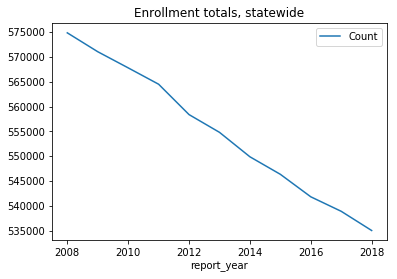

In [19]:
import matplotlib.pyplot as plt
all_df[all_df["District"] == "Total"].set_index("report_year")\
.sort_index()["Count"].to_frame().plot(
    title="Enrollment totals, statewide"
)
plt.gcf().savefig("figures/for-story/2.1 Enrollment - statewide total, all districts.png")